# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

Realizado por: Jorge Luis Medina Herrada.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

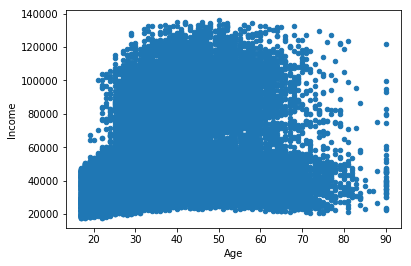

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

In [4]:
y_income=income['Income'].values
x_age=income['Age'].values
np.corrcoef(x_age,y_income)

array([[1.       , 0.2904083],
       [0.2904083, 1.       ]])

punto 1. What is the relation between the age and Income?

existe una correlación bajo positiva, pero esto no genera una clara relación entre la edad y el ingreso puesto que si una persona gana demasiado puede estar comprendida entre cualquier edad.

In [5]:
y_income_mean, y_income_std = y_income.mean(), y_income.std()
x_age_mean, x_age_std = x_age.mean(), x_age.std()

y = (y_income - y_income_mean)/ y_income_std
X = (x_age - x_age_mean)/ x_age_std



In [6]:
# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

In [7]:
# import
from sklearn.linear_model import SGDRegressor

# Initialize
linreg = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)

In [8]:
# Fit
linreg.fit(X_, y_income)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=False, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=500,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=1e-07, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [9]:
linreg.coef_

array([52642.81494353,  6997.33159939])

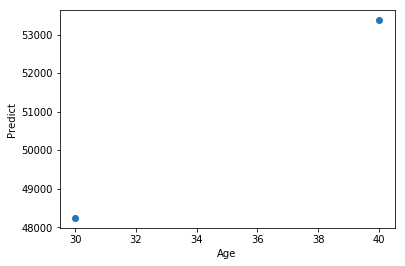


 como se puede observar en la graficas a medida que se aunmenta la edad incrementa el valor de ingreso de la persona.

 se observa los valores de prediscion para 30 años y 40 años [48240.49486346 53370.4194637 ]


In [10]:
x_age_30_40=np.array([30,40])
X_30_40 = (x_age_30_40 - x_age_mean)/ x_age_std
x_age_py = np.c_[np.ones(2), X_30_40]

y_pred=linreg.predict(x_age_py)


plt.scatter(x_age_30_40,y_pred)
plt.xlabel('Age')
plt.ylabel('Predict')
plt.show()

print("\n","como se puede observar en la graficas a medida que se aunmenta la edad",
      "incrementa el valor de ingreso de la persona.")
print("\n","se observa los valores de prediscion para 30 años y 40 años",y_pred)


In [11]:
y_pred=linreg.predict(X_)
y_pred= (y_pred - y_income_mean)/ y_income_std


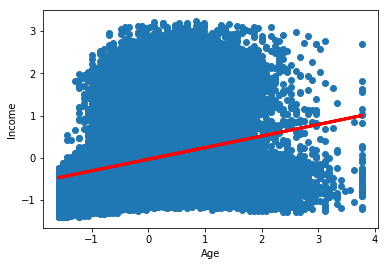

El anterior grafico nos muestra que hay una relación positiva por cada año transcurido


In [12]:
# scatter plot

plt.scatter(X, y)
plt.plot(X,y_pred, color="red", linewidth=3)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

print("El anterior grafico nos muestra que hay una relación positiva por cada año transcurido")

For a one percent increase in the Age how much the income increases?

In [13]:
from sklearn.preprocessing import normalize

x_age_0_1=np.array([0,1])
x_age_py = np.c_[np.ones(2), x_age_0_1]

pp=linreg.predict(x_age_py)

Result=pp[1]-pp[0]

print("un cambion porcentual en la edad, que seria equivalente a pensar que es un año de edad tendra un aumento del $",
      round(Result,1),"por cadad año que transcura")

un cambion porcentual en la edad, que seria equivalente a pensar que es un año de edad tendra un aumento del $ 6997.3 por cadad año que transcura


# Exercise 4.2
Evaluate the model using the MSE

In [14]:
from sklearn import metrics
import numpy as np
m1=metrics.mean_squared_error(y, y_pred)
print('MSE:', metrics.mean_squared_error(y, y_pred))

MSE: 0.9169264937436058



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [15]:
income['Age2'] = income['Age'] ** 2
X = income[['Age', 'Age2']].values


In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([  38.58164676, 1674.59915236]), array([  13.64022309, 1179.02941609]))

In [17]:
X[0:5]

array([[ 0.03067056, -0.13027593],
       [ 0.83710898,  0.70006807],
       [-0.04264203, -0.19558388],
       [ 1.05704673,  0.96214804],
       [-0.77576787, -0.75536635]])

In [18]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.03067056, -0.13027593],
       [ 1.        ,  0.83710898,  0.70006807],
       [ 1.        , -0.04264203, -0.19558388],
       [ 1.        ,  1.05704673,  0.96214804],
       [ 1.        , -0.77576787, -0.75536635]])

In [19]:
# import
from sklearn.linear_model import LinearRegression

In [20]:
# Initialize
linreg2 = LinearRegression(fit_intercept=False)

In [21]:
# Fit
linreg2.fit(X_, y_income)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [22]:
linreg2.coef_

array([ 53455.8091582 ,  42718.04340395, -36011.57934338])

In [23]:
y_pred=linreg2.predict(X_)
y_pred

array([59457.43730796, 64004.91007115, 58677.50976818, ...,
       62669.56460721, 37890.86149963, 64037.59463011])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [24]:
X = income[['Age', 'fnlwgt','Capital Gain','Capital Loss','Hours per week']].values

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([3.85816468e+01, 1.89778367e+05, 1.07764884e+03, 8.73038297e+01,
        4.04374559e+01]),
 array([1.36402231e+01, 1.05548357e+05, 7.38517868e+03, 4.02954031e+02,
        1.23472391e+01]))

In [26]:
X_ = np.c_[np.ones(n_samples), X]

In [27]:
# import
from sklearn.linear_model import SGDRegressor

# Initialize
linreg3 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)

# Fit
linreg3.fit(X_, y_income)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=False, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=500,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=1e-07, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [28]:
linreg3.coef_

array([53536.42315538,  6267.13866348,   310.66923714,  4253.0565372 ,
        3200.29351699,  6509.46266941])

In [29]:
y_pred3=linreg3.predict(X_)
y_pred3
y_pred3= (y_pred3 - y_income_mean)/ y_income_std

In [30]:
from sklearn import metrics
import numpy as np

m3=metrics.mean_squared_error(y, y_pred3)
print('MSE:', metrics.mean_squared_error(y, y_pred3))

MSE: 0.8000688829555135


How is the performance compared to using only the Age?

In [31]:
print('MSE:', m1)
print('MSE:', m3)
print("como se puede observar el mejor modelo 3 tiene un mejor comportamiento que el modelo 1 pero esto no",
     "no quiere decir mucho debido a que su MSE son demasiado grandes.")


MSE: 0.9169264937436058
MSE: 0.8000688829555135
como se puede observar el mejor modelo 3 tiene un mejor comportamiento que el modelo 1 pero esto no no quiere decir mucho debido a que su MSE son demasiado grandes.


# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [32]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [33]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [34]:
data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [35]:
data.drop(['State','Account Length','Area Code','Phone',"Int'l Plan",'VMail Message','VMail Plan'],axis=1,inplace=True)
data_ = data

In [36]:
data_Dummy = pd.get_dummies(data_,columns=["Churn?"])

In [37]:
data_Dummy.shape

(3333, 15)

In [38]:
data_Dummy.head()

,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?_False.,Churn?_True.
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0
3,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


What is the distribution of the churners?

In [39]:
X = data_Dummy[['Day Mins', 'Day Calls','Day Charge',
            'Eve Mins','Eve Calls','Eve Charge','Night Mins',
            'Night Calls','Night Charge','Intl Mins','Intl Calls','Intl Charge','CustServ Calls']].values

y=data_Dummy[['Churn?_True.']].values

In [40]:
n_sample=y.shape[0]

suma = 0
for fila in y:
    for n in fila:
        suma += n

distribucion=suma/n_sample
print(suma,n_sample,round(distribucion,3))

483 3333 0.145


In [41]:
# codigo para nico
n_sample=y.shape[0]
sum=y.sum()
distribution=sum/n_sample

print("La distribucion es una Bernoulli pues el objetivo es predecir un existo o fracaso",
      "La Probabilidad de que una persona abandone el plan es de")
print('P:',round(distribution,3))

La distribucion es una Bernoulli pues el objetivo es predecir un existo o fracaso La Probabilidad de que una persona abandone el plan es de
P: 0.145


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=1e9)



In [44]:
logreg.fit(X_train, y_train.ravel())

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [45]:
Y_predictions = logreg.predict(X_test)

In [46]:
Y_predictions[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


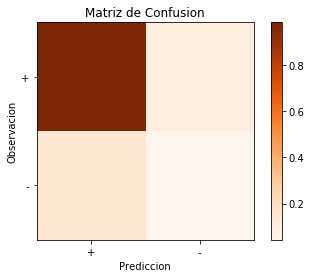




 Clasificación:
verdadero Positivos 84.9 %
verdadera Negativos: 1.3 %
Falsos negativos: 13.2 %
Falsos positivos: 0.6 %


In [47]:
from sklearn.metrics import confusion_matrix

Confusion=confusion_matrix(y_test, Y_predictions)
Confusion_norm= Confusion/Confusion.sum(axis=1)
n_sample=y_test.shape[0]

Clase=['+','-']
marca=np.arange(len(Clase))


print("\n")
plt.imshow(Confusion_norm, cmap=plt.cm.Oranges,interpolation='None')
plt.title('Matriz de Confusion')
plt.xlabel('Prediccion')
plt.ylabel('Observacion')
plt.xticks(marca,Clase)
plt.yticks(marca,Clase)
plt.colorbar()
plt.show()

print("\n")
print("\n","Clasificación:")
print("verdadero Positivos",round((Confusion[0,0]/n_sample)*100,2),"%")
print("verdadera Negativos:",round((Confusion[0,1]/n_sample)*100,2),"%")
print("Falsos negativos:",round((Confusion[1,0]/n_sample)*100,2),"%")
print("Falsos positivos:",round((Confusion[1,1]/n_sample)*100,2),"%")


El modelo de regresion logistica esta predicciendo con una exsatitud, las personas que no desertan, pero es de importancia mejorar la estimaciones de la personas que avandona para mejorar su estimacion.

In [48]:
from sklearn.metrics import accuracy_score 

print('Accuracy: \n', accuracy_score( y_test, Y_predictions))
print("El modelo de estimacion se considera adecuado debido a que si exsatitud es del 86%")

Accuracy: 
 0.855
El modelo de estimacion se considera adecuado debido a que si exsatitud es del 86%
